In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =11,10

In [2]:
dataset = pd.read_csv("RAPE_TOTAL.csv")
# dataset['Year'] = pd.to_datetime(dataset['Year'], infer_datetime_format= True)
indexedDataset = dataset.set_index(['Year'])

In [3]:
from datetime import datetime
indexedDataset

,Rape
Year,
2001,16075
2002,16373
2003,15847
2004,18233
2005,18359
2006,19348
2007,20737
2008,21467
2009,21397


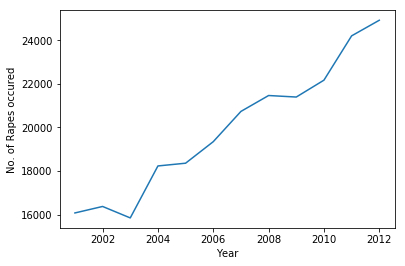

In [4]:
plt.xlabel("Year")
plt.ylabel("No. of Rapes occured")
plt.plot(indexedDataset)

In [5]:
#as we can see the data is not stationary, theres an upward trend..it keeps on fluctuating
#there are 2 diff ways by which you can check the stationarity of the data. 1-by rolling mean and rolling std and 2-by dickey-fuller test 
rolmean = indexedDataset.rolling(window=2).mean() #for determining the rolling mean and standard deviation
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean, rolstd)

         Rape
Year         
2001      NaN
2002  16224.0
2003  16110.0
2004  17040.0
2005  18296.0
2006  18853.5
2007  20042.5
2008  21102.0
2009  21432.0
2010  21784.5
2011  23189.0
2012  24564.5              Rape
Year             
2001          NaN
2002   210.717821
2003   371.938167
2004  1687.156780
2005    89.095454
2006   699.328607
2007   982.171319
2008   516.187950
2009    49.497475
2010   548.007755
2011  1438.255193
2012   506.995562


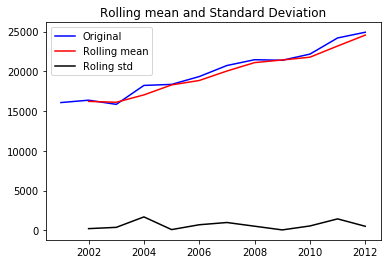

In [6]:
orig = plt.plot(indexedDataset, color ='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Roling std')
plt.legend(loc='best')
plt.title('Rolling mean and Standard Deviation')
plt.show(block=False)

In [7]:
#from the above graph you can see that the std and mean is not constant, it keeps on changing
#dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ('Results of dickey-fuller test:')
dftest = adfuller(indexedDataset['Rape'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
    
print(dfoutput)

Results of dickey-fuller test:
Test statstic                  0.346018
p-value                        0.979360
#Lags Used                     3.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


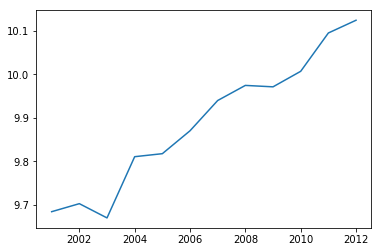

In [8]:
#as you can see the value of p is 0.9 ....but the null hypothesis should be as less as possible ...must be around 0.5
#hence we cannot reject the null hypothesis ...this shows that the data is not stationary 
indexedDataset_logScale = np.log(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_logScale) #since log of the data is done the y axis values changes accordingly bt the trend remains the same

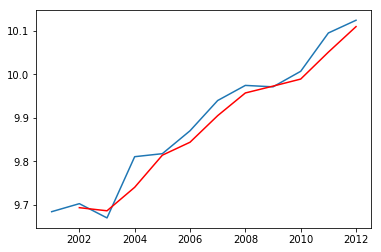

In [9]:
#calculating the mean and std of the log value
movingAverage = indexedDataset_logScale.rolling(window=2).mean()
movingSTD=indexedDataset_logScale.rolling(window=2).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red')     
#over here as well the data is not stationary the mean keeps changing according to the time

In [10]:
#finding the difference of the two types
#the data can be made stationary by diff ways such as taking log ,squaring, cube root etc
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Rape
Year,
2002,0.009184
2003,-0.016327
2004,0.070126
2005,0.003443
2006,0.026235
2007,0.034665
2008,0.017299
2009,-0.001633
2010,0.017790


In [11]:
# the code for a  DCF 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Rape'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

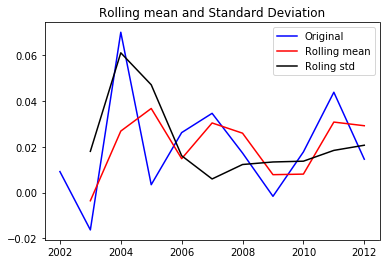

Results of dickey-fuller test:
Test statstic                  -0.000000
p-value                         0.958532
#Lags Used                      7.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [12]:
test_stationarity(datasetLogScaleMinusMovingAverage)

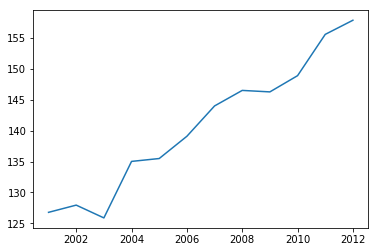

In [13]:
indexedDataset_sqScale = np.sqrt(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_sqScale)

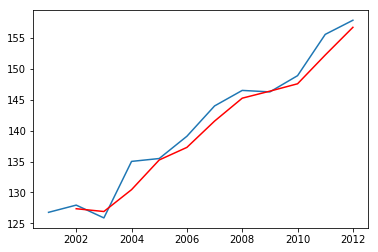

In [14]:
movingAveragesq = indexedDataset_sqScale.rolling(window=2).mean()
movingSTDsq = indexedDataset_sqScale.rolling(window=2).std()
plt.plot(indexedDataset_sqScale)
plt.plot(movingAveragesq,color='red') 

In [15]:
datasetsqScaleMinusMovingAverage = indexedDataset_sqScale - movingAveragesq
datasetsqScaleMinusMovingAverage

datasetsqScaleMinusMovingAverage.dropna(inplace=True)
datasetsqScaleMinusMovingAverage

,Rape
Year,
2002,0.584900
2003,-1.036078
2004,4.572379
2005,0.232880
2006,1.800851
2007,2.453192
2008,1.256369
2009,-0.119538
2010,1.312759


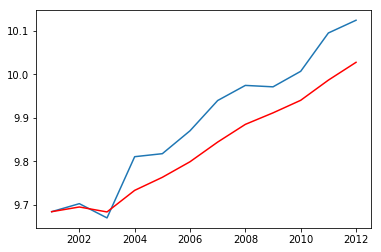

In [16]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife= 2,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')

In [17]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAveragesq = timeseries.rolling(window=2).mean()
    movingSTDsq = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAveragesq, color='red', label='Rolling mean')
    std = plt.plot(movingSTDsq, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Rape'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

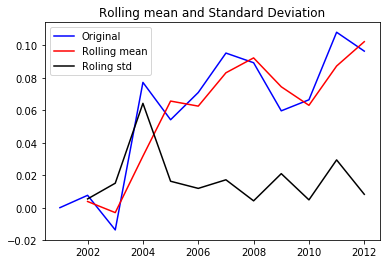

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [18]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

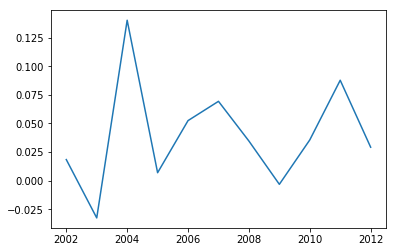

In [19]:
datasetLogDiffShifting = indexedDataset_logScale- indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

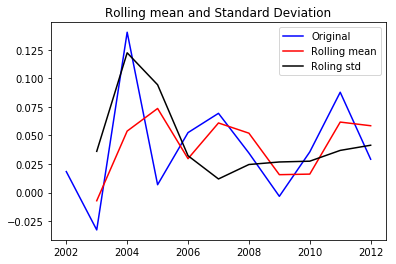

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [20]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

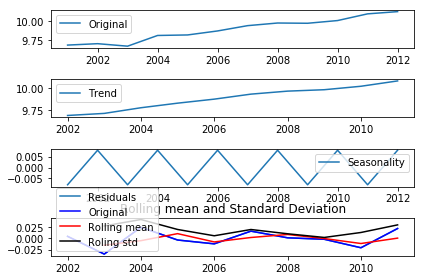

Results of dickey-fuller test:
Test statstic                  -0.000000
p-value                         0.958532
#Lags Used                      6.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexedDataset_logScale, freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale , label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


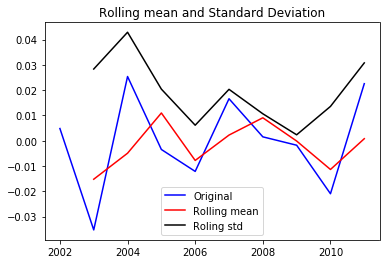

Results of dickey-fuller test:
Test statstic                  -0.000000
p-value                         0.958532
#Lags Used                      6.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


In [22]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


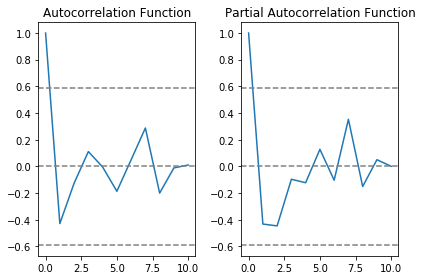

In [23]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=10)
lag_pacf = pacf(datasetLogDiffShifting, nlags =10, method='ols')

#plotting acf:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()



Plotting AR model


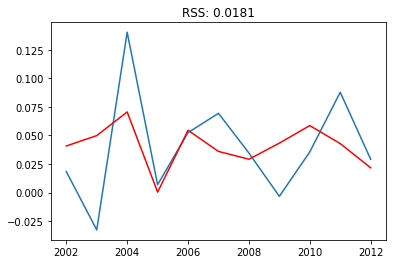

In [33]:
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(indexedDataset_logScale, order=(1,1,0)) #here the order includes value from the acf and pacf  ie p and q are the first downfall of the graph ie 1 and the midde value is the difference 
#the RSS value must be as low as possible
results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Rape"])**2))
print('Plotting AR model')

Plotting AR model


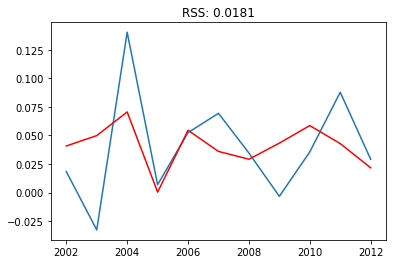

In [34]:
#MA Model
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(indexedDataset_logScale, order= (1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color ='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting["Rape"])**2))
print('Plotting AR model')

Text(0.5,1,'RSS: 13084469.1093')

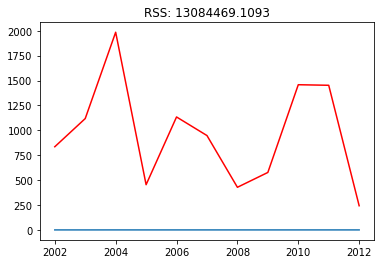

In [35]:
import warnings
warnings.filterwarnings("ignore")
model = ARIMA(indexedDataset, order = (1, 1 ,1))
results_ARIMA =  model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Rape'])**2))

In [27]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
2002     835.156622
2003    1118.080269
2004    1984.739564
2005     453.986804
2006    1134.065662
dtype: float64


In [28]:
#converting it to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Year
2002      835.156622
2003     1953.236890
2004     3937.976455
2005     4391.963259
2006     5526.028921
2007     6473.440836
2008     6901.438759
2009     7478.444866
2010     8936.245109
2011    10388.435536
2012    10631.133742
dtype: float64


In [29]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Rape'].iloc[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
2001       9.685021
2002     844.841642
2003    1962.921911
2004    3947.661475
2005    4401.648279
dtype: float64

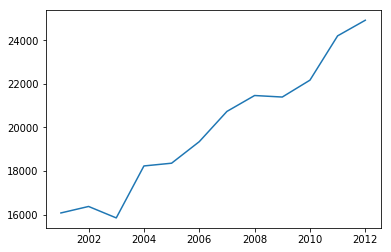

In [30]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

#orange line is the model that we have fitted 

In [31]:
 #before predicitng check the no. of rows
indexedDataset_logScale

,Rape
Year,
2001,9.685021
2002,9.703389
2003,9.670735
2004,9.810988
2005,9.817875
2006,9.870344
2007,9.939675
2008,9.974272
2009,9.971006


Text(0,0.5,'No. of Rapes occured')

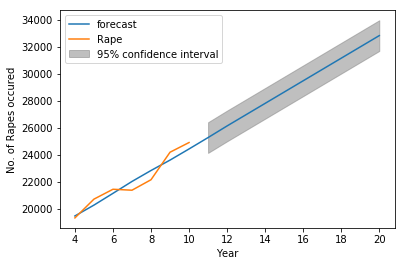

In [77]:
import warnings
warnings.filterwarnings("ignore")
results_ARIMA.plot_predict(5,21)
plt.xlabel("Year")
plt.ylabel("No. of Rapes occured")

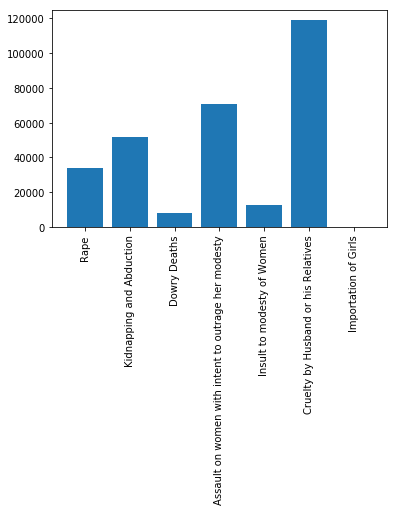

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv("2013.csv") 
# Make a fake dataset:
height = ds.Rate
bars = ds.Crimes
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars , rotation=90)
#text(seq(1, 10, by=1), par("usr")[3] - 0.2, labels = lablist, srt = 45, pos = 1, xpd = TRUE)
 
# Show graphic
plt.show()